# Let's try to select stellar streams in phase space

In [2]:
import corner
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
data_dir = os.path.abspath(os.path.join(root_dir, '..', 'data'))

ADQL query for all stars with parallax SNR $\geq 10$ and between $1-100$ pc:

```SQL
select TOP 1000000 
    * 
FROM gaiadr2.gaia_source 
WHERE
    (parallax_over_error >= 10) AND
    (parallax <= 1000) AND
    (parallax >= 10)
```

In [3]:
df = pd.read_csv(os.path.join(data_dir, 'nearest_1-100-pc.csv'))
df.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
0,1635721458409799680,Gaia DR2 2065088312504981376,2065088312504981376,670825299,2015.5,313.547630,0.021469,40.245637,0.024501,10.638985,...,0.3913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
1,1635721458409799680,Gaia DR2 4144469825201819008,4144469825201819008,1103385300,2015.5,268.440482,1.248898,-17.730894,1.218709,17.088371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
2,1635721458409799680,Gaia DR2 4464059711767037440,4464059711767037440,333895231,2015.5,246.170032,0.420192,14.712242,0.278973,13.183676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
3,1635721458409799680,Gaia DR2 6680674058148497920,6680674058148497920,1678706835,2015.5,307.208712,0.098434,-40.776879,0.062056,11.189977,...,0.4220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
4,1635721458409799680,Gaia DR2 4464071428437816960,4464071428437816960,1164638507,2015.5,245.843783,0.230177,14.709175,0.163686,12.621358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN


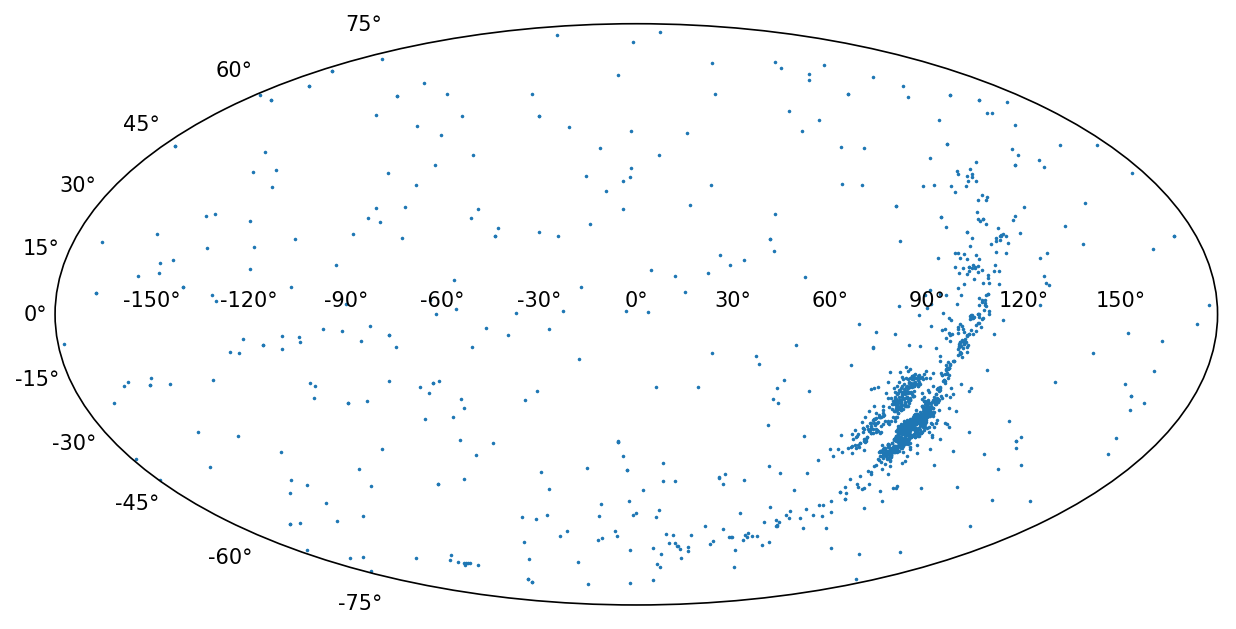

In [14]:
fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='mollweide')

nearby = df[df.parallax > 100]

#q = ax.quiver(nearby.ra, nearby.dec, df.pmra, nearby.pmdec)
ax.scatter(np.deg2rad(nearby.ra - 180), np.deg2rad(nearby.dec), s=0.5, c='C0')

### Look at covarying parameters...

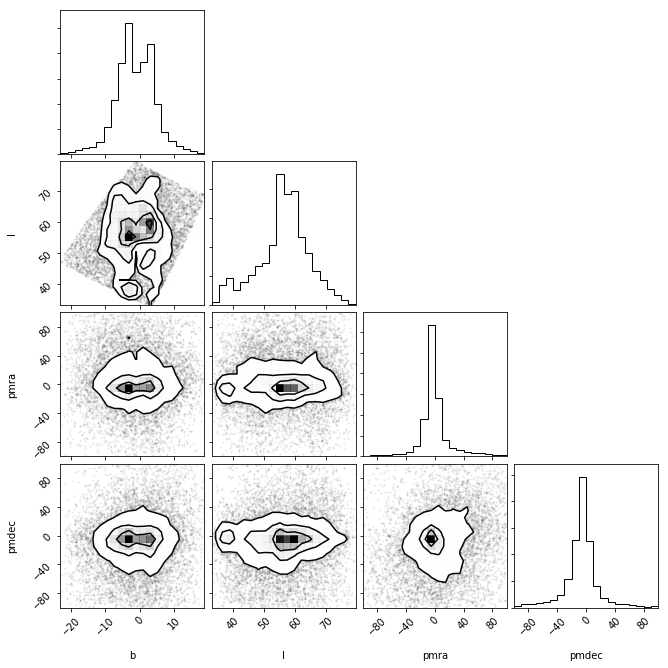

In [34]:
nearby = df[df.parallax > 10]

nearby_cut = nearby[(np.abs(nearby.pmra) < 100) & 
                    (np.abs(nearby.pmdec) < 100) &
                    (280 < nearby.ra) & (nearby.ra < 310) &
                    (1 < nearby.dec) & (nearby.dec < 40)]

corner.corner(nearby_cut[['b', 'l', 'pmra', 'pmdec']]);